In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('Donation Blood.csv')

In [2]:
df_train.shape

(576, 6)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Unnamed: 0                     576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [6]:
df_train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [7]:
df_train.nunique()

Unnamed: 0                     576
Months since Last Donation      29
Number of Donations             29
Total Volume Donated (c.c.)     29
Months since First Donation     75
Made Donation in March 2007      2
dtype: int64

In [8]:
df_train.describe().round()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.0,576.0,576.0,576.0,576.0,576.0
mean,374.0,9.0,5.0,1357.0,34.0,0.0
std,217.0,8.0,6.0,1435.0,24.0,0.0
min,0.0,0.0,1.0,250.0,2.0,0.0
25%,184.0,2.0,2.0,500.0,16.0,0.0
50%,376.0,7.0,4.0,1000.0,28.0,0.0
75%,562.0,14.0,7.0,1750.0,49.0,0.0
max,747.0,74.0,50.0,12500.0,98.0,1.0


In [9]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df_train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

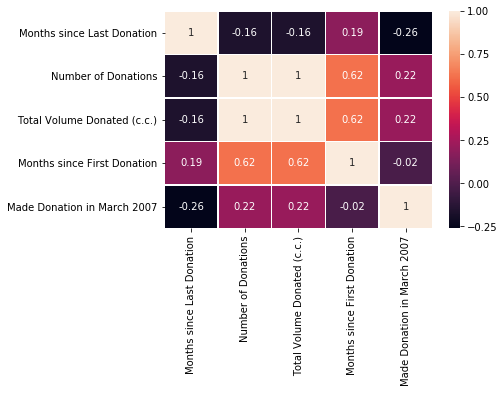

In [12]:
sns.heatmap(df_train.corr(), annot=True, linewidth=0.5)
plt.show()

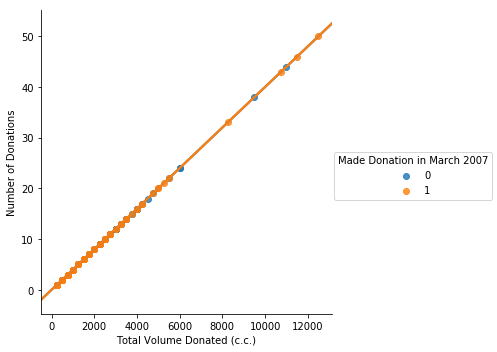

In [16]:
sns.lmplot('Total Volume Donated (c.c.)', 'Number of Donations', hue='Made Donation in March 2007', data = df_train)
plt.show()

In [17]:
df_train.drop('Total Volume Donated (c.c.)', axis=1, inplace=True)

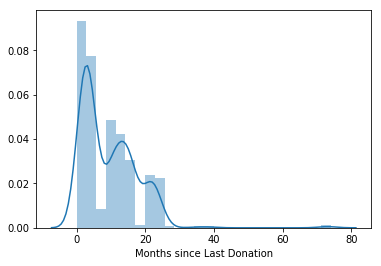

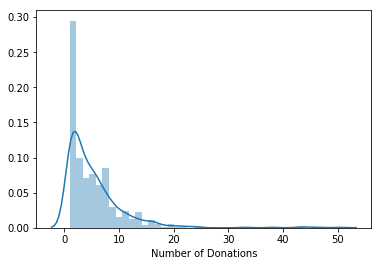

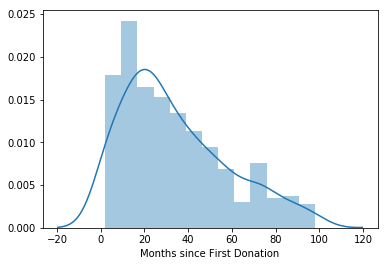

In [30]:
predictor = ['Months since Last Donation', 'Number of Donations', 'Months since First Donation']
for var in predictor :
    sns.distplot(df_train[var])
    plt.show()

In [21]:
df_train.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

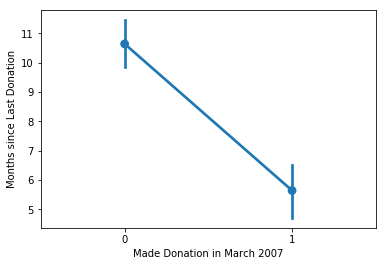

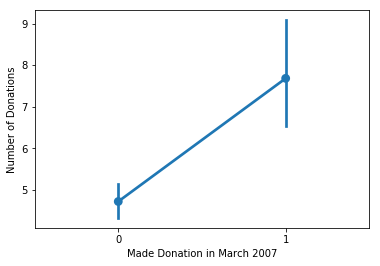

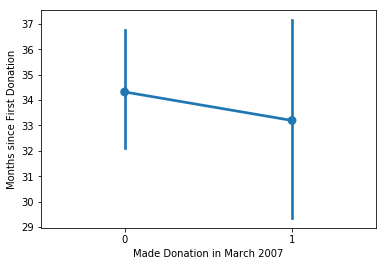

In [25]:
for v in predictor :
    sns.pointplot('Made Donation in March 2007', v, data=df_train)
    plt.show()

In [22]:
df_train.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Months since First Donation', 'Made Donation in March 2007'],
      dtype='object')

In [41]:
df_train['Donation_Frek_per_month'] = (df_train['Months since Last Donation']-df_train['Months since First Donation'])/df_train['Number of Donations'] 

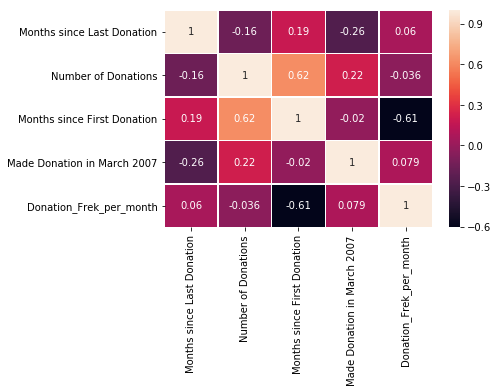

In [42]:
sns.heatmap(df_train.corr(), annot=True, linewidth=0.5)
plt.show()

## Data Preparation

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_train.drop('Made Donation in March 2007', axis=1))

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                          4.702181
Months since Last Donation     1.663404
Number of Donations            3.549362
Months since First Donation    5.921654
Donation_Frek_per_month        3.145417
dtype: float64

In [51]:
df_train.drop(['Months since First Donation'], axis=1, inplace=True)

## Modeling

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler

In [70]:
from sklearn.model_selection import train_test_split

scaler = RobustScaler()

y = df_train['Made Donation in March 2007']
x = df_train.drop('Made Donation in March 2007', axis=1)

tranformer = scaler.fit(x)
x = tranformer.transform(x) 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25)

In [78]:
"""LOGISTIC REGRESSION MODEL"""

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss

logreg = LogisticRegression()
weights = np.linspace(0.05, 0.95, 10)
param = {'C': np.arange(0.05,1,0.2), 'class_weight':[{0: x, 1: 1.0-x} for x in weights]}

grid_model = GridSearchCV(logreg, param, cv=10, n_jobs=-1, scoring='neg_log_loss')
grid_model.fit(x_train, y_train)

print(grid_model.best_params_)
print(-(grid_model.best_score_))

pred = grid_model.predict_proba(x_test)
print(log_loss(y_test, pred))

{'C': 0.45, 'class_weight': {0: 0.5499999999999999, 1: 0.45000000000000007}}
0.5014514949676302
0.47781092888112675


In [79]:
score = []
score.append(log_loss(y_test, pred))

In [128]:
"""RANDOM FOREST AND DECISION TREE MODEL"""

RF = RandomForestClassifier()
DT = DecisionTreeClassifier()

param_RF = {'n_estimators':np.arange(10, 150, 30), 'max_features':[2,3], 'max_depth':np.arange(1,6), 'min_samples_split':np.arange(10, 200, 50)}

grid_model_RF = GridSearchCV(RF, param_RF, cv=10, n_jobs=-1, scoring='neg_log_loss')
grid_model_RF.fit(x_train, y_train)
print(grid_model_RF.best_params_)
print(grid_model_RF.best_score_)

param_DT = {'max_depth' : np.arange(1,6), 'min_samples_split':np.arange(30, 150, 30)}
grid_model_DT = GridSearchCV(DT, param_DT, cv=10, n_jobs=-1, scoring='neg_log_loss')
grid_model_DT.fit(x_train, y_train)


{'max_depth': 3, 'max_features': 2, 'min_samples_split': 110, 'n_estimators': 10}
-0.4930193227880614


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5]), 'min_samples_split': array([ 30,  60,  90, 120])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [90]:
print('RandomForest')
print(grid_model_RF.best_params_)
print(-(grid_model_RF.best_score_))
print('DecisionTree')
print(grid_model_DT.best_params_)
print(-(grid_model_DT.best_score_))

pred_RF = grid_model_RF.predict_proba(x_test)
pred_DT = grid_model_DT.predict_proba(x_test)
print('Valiation Score')
print(log_loss(y_test, pred_RF))
print(log_loss(y_test, pred_DT))

RandomForest
{'max_depth': 3, 'max_features': 2, 'min_samples_split': 60, 'n_estimators': 40}
0.49408864847225653
DecisionTree
{'max_depth': 4, 'min_samples_split': 90}
0.49471022423369876
Valiation Score
0.4649896411561978
0.4848961045720068


In [91]:
score.append(log_loss(y_test, pred_RF))
score.append(log_loss(y_test, pred_DT))

In [96]:
"""SVM MODEL"""

svm = SVC(random_state = 42, probability=True)

param_svm = {'kernel':['linear', 'rbf', 'sigmoid'], 'C':np.arange(0.05,1,0.2), 
             'class_weight':[{0: x, 1: 1.0-x} for x in weights]}

grid_model_svm = GridSearchCV(svm, param_svm, cv=10, n_jobs=-1, scoring='neg_log_loss')
grid_model_svm.fit(x_train, y_train)
print(grid_model_svm.best_params_)
print(-(grid_model_svm.best_score_))

{'C': 0.8500000000000001, 'class_weight': {0: 0.35, 1: 0.65}, 'kernel': 'rbf'}
0.4892676534793474


In [98]:
pred_svm = grid_model_svm.predict_proba(x_test)
print(log_loss(y_test, pred_svm))

0.47149377889978467


In [101]:
score.append(log_loss(y_test, pred_svm))

In [107]:
"""Adaboost & GradientBoosting"""

adaboost = AdaBoostClassifier(random_state=42)
gradientboost = GradientBoostingClassifier()

param_ab = {'n_estimators' : np.arange(50, 200, 30), 'learning_rate': np.arange(0.05, 1, 0.2)}
param_gb = {'loss':['deviance', 'exponential'], 'learning_rate':np.arange(0.05, 1, 0.2), 'n_estimators':np.arange(50, 150, 30),
           'max_features':[2,3], 'max_depth':np.arange(1,6), 'min_samples_split':np.arange(10, 200, 50)}

grid_model_ab = GridSearchCV(adaboost, param_ab, cv=10, n_jobs=-1, scoring='neg_log_loss')
grid_model_gb = GridSearchCV(gradientboost, param_gb, cv=10, n_jobs=-1, scoring='neg_log_loss')
grid_model_ab.fit(x_train, y_train)
grid_model_gb.fit(x_train, y_train)

print('Adaboost')
print(grid_model_ab.best_params_)
print(-(grid_model_ab.best_score_))
print('Gradientboost')
print(grid_model_gb.best_params_)
print(-(grid_model_gb.best_score_))

pred_ab = grid_model_ab.predict_proba(x_test)
pred_gb = grid_model_gb.predict_proba(x_test)
print('Valiation Score')
print(log_loss(y_test, pred_ab))
print(log_loss(y_test, pred_gb))

Adaboost
{'learning_rate': 0.05, 'n_estimators': 50}
0.5698512343605697
Gradientboost
{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 2, 'max_features': 2, 'min_samples_split': 160, 'n_estimators': 50}
0.4930244085839904
Valiation Score
0.5642927310250307
0.4775306145229683


In [108]:
score.append(log_loss(y_test, pred_ab))
score.append(log_loss(y_test, pred_gb))

In [109]:
pd_score = pd.DataFrame({'score':score},index=['Logistic Regression',  'Random Forest', 'Decision Tree', 'SVM', 'Adaboost', 'Gradient Boosting'])

In [113]:
pd_score.sort_values(by='score')

,score
Random Forest,0.464990
SVM,0.471494
Gradient Boosting,0.477531
Logistic Regression,0.477811
Decision Tree,0.484896
Adaboost,0.564293


## Predict And Submission

In [115]:
df_test = pd.read_csv('Donation_test.csv')

In [116]:
df_test['Donation_Frek_per_month'] = (df_test['Months since Last Donation']-df_test['Months since First Donation'])/df_test['Number of Donations'] 

In [124]:
df_test.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Donation_Frek_per_month'],
      dtype='object')

In [120]:
df_test.drop(['Unnamed: 0', 'Total Volume Donated (c.c.)', 'Months since First Donation'], axis=1, inplace=True)

In [130]:
test_transform = tranformer.transform(df_test)

pred_test = grid_model_RF.predict_proba(test_transform)

In [134]:
proba_test = []
for a, b in pred_test :
    proba_test.append(b)

In [139]:
submission_format = pd.read_csv('BloodDonationSubmissionFormat.csv')

In [141]:
submission_format['Made Donation in March 2007'] = proba_test

In [142]:
submission_format.index = submission_format['Unnamed: 0']

In [144]:
submission_format.drop('Unnamed: 0', axis=1, inplace=True)

In [146]:
submission_format.to_csv('submission okt 2018.csv')